In [26]:
!pip install pandas numpy matplotlib scikit-learn seaborn flask
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [27]:
Churn_data = pd.read_csv('data/Dataset2.csv')
Dash_df = Churn_data.copy()
Churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,NaN,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,NaN,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,NaN,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28.0,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62.0,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [28]:
Churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7034.000000,7043.000000
mean,0.162147,32.370344,64.761692
std,0.368612,24.565058,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
Churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
# Preprocessing #1 - Encode SeniorCitizen to be Categorical and Convert TotalCharges to Numeric
Churn_data['SeniorCitizen'] = Churn_data['SeniorCitizen'].astype('object')
Churn_data['TotalCharges'] = pd.to_numeric(Churn_data['TotalCharges'], errors='coerce')

In [31]:
numericalColumn = np.array(Churn_data.select_dtypes(include=[np.number]).columns)
categoryColumn = np.array(Churn_data.select_dtypes(include=[object]).columns)

In [32]:
print(numericalColumn)

['tenure' 'MonthlyCharges' 'TotalCharges']


## Q2 - A
### Type of Distribution of Data

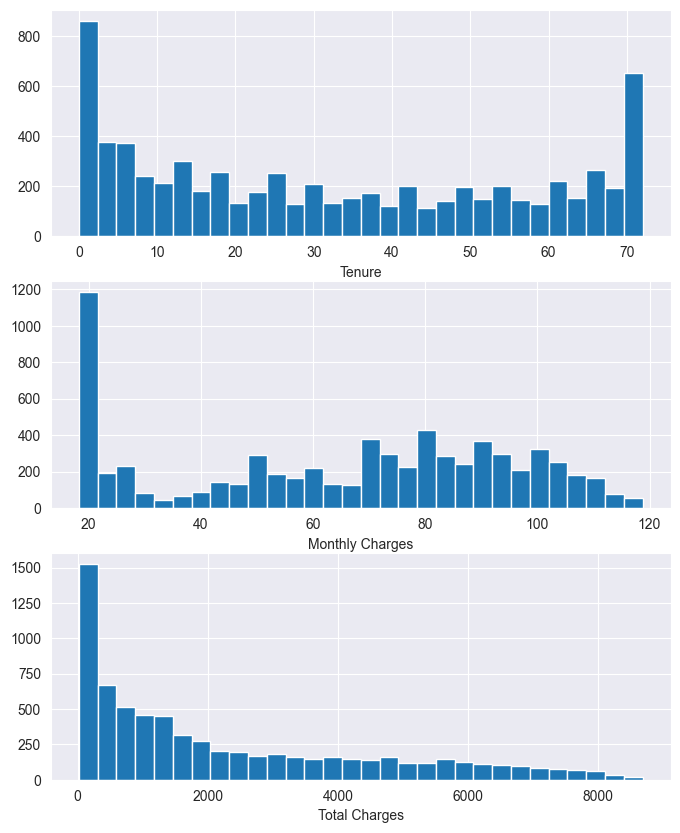

In [33]:
fig = plt.figure(figsize=(8, 10))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.hist(Churn_data['tenure'], bins=30)
ax1.set_xlabel('Tenure')

ax2.hist(Churn_data['MonthlyCharges'], bins=30)
ax2.set_xlabel('Monthly Charges')

ax3.hist(Churn_data['TotalCharges'].dropna(), bins=30)
ax3.set_xlabel('Total Charges')

plt.show()

## Q2 - B
### Visualize outliers in the data

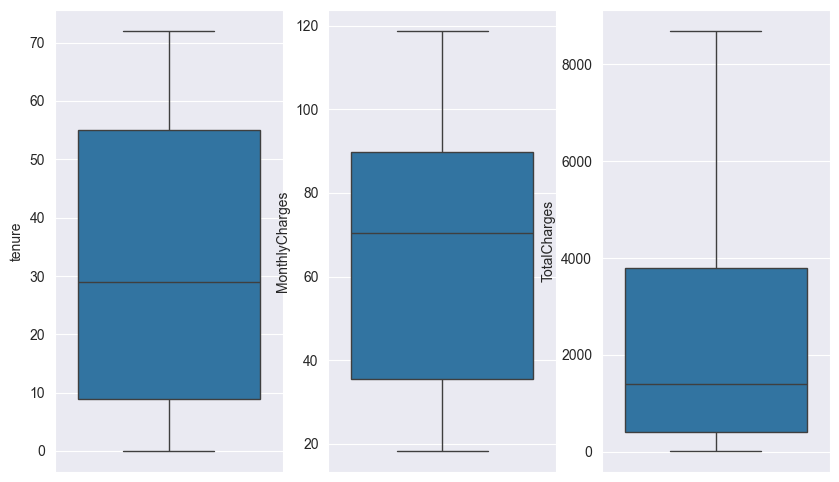

In [34]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='tenure', data=Churn_data)
plt.subplot(1, 3, 2)
sns.boxplot(y='MonthlyCharges', data=Churn_data)
plt.subplot(1, 3, 3)
sns.boxplot(y='TotalCharges', data=Churn_data)
plt.show()

### No outliers where found in the data
## Q2 - C
### Top 3 Categorical Features with High Count

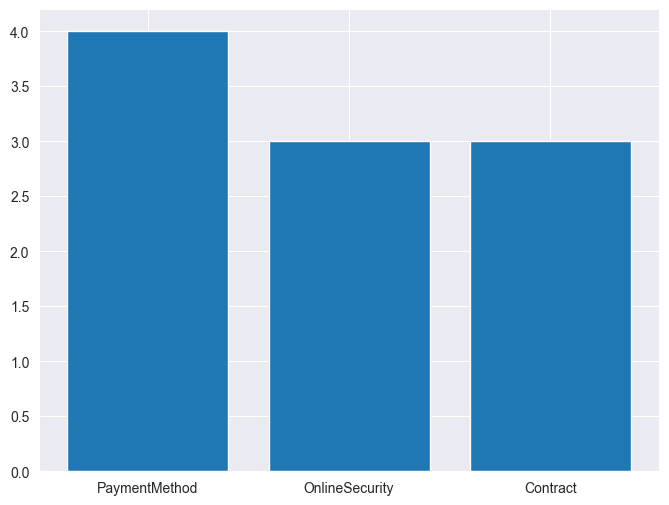

In [35]:
# Q2 - C
countCategorical = Churn_data[categoryColumn].nunique().sort_values(ascending=False)[1:4]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.bar(countCategorical.index, countCategorical.values)
plt.show()

## Q2 - D
### Preprocessing #2 - Encode Categorical Data

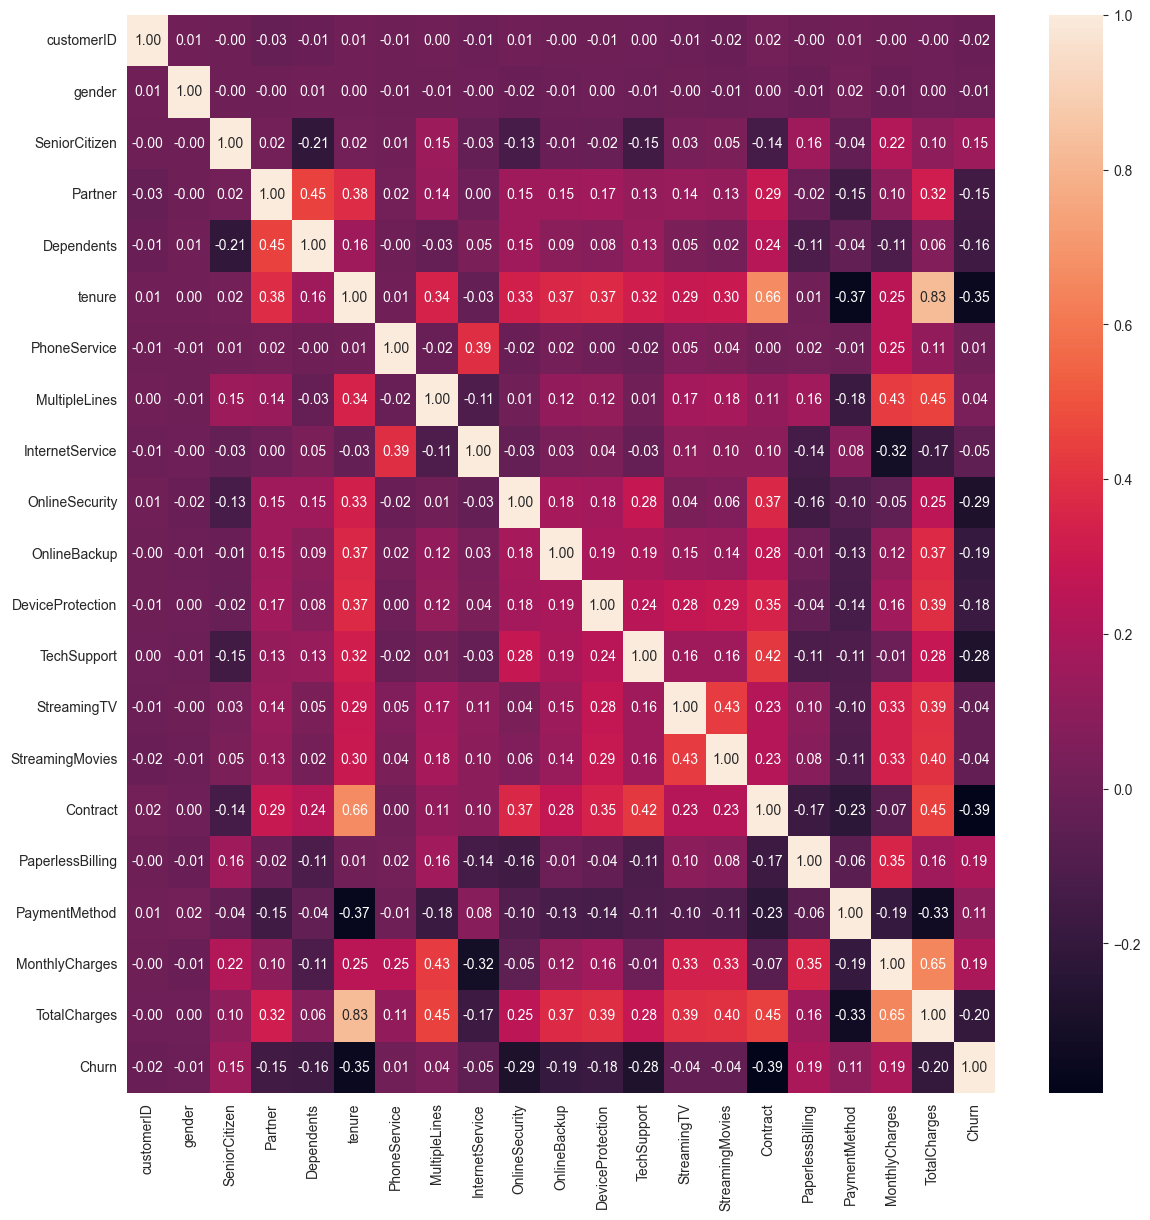

In [36]:
le = LabelEncoder()
for col in categoryColumn:
    Churn_data[col] = le.fit_transform(Churn_data[col])
plt.figure(figsize=(14, 14))
sns.heatmap(Churn_data.corr(), annot=True, fmt='.2f')
plt.show()

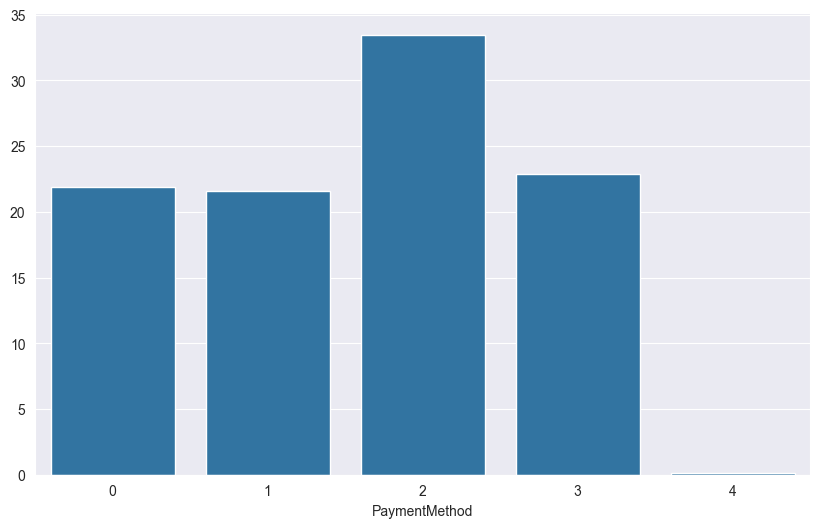

In [37]:
plt.figure(figsize=(10, 6))
PaymentMethod = Churn_data['PaymentMethod'].value_counts(normalize=True) * 100
sns.barplot(x=PaymentMethod.index, y=PaymentMethod.values)
plt.show()

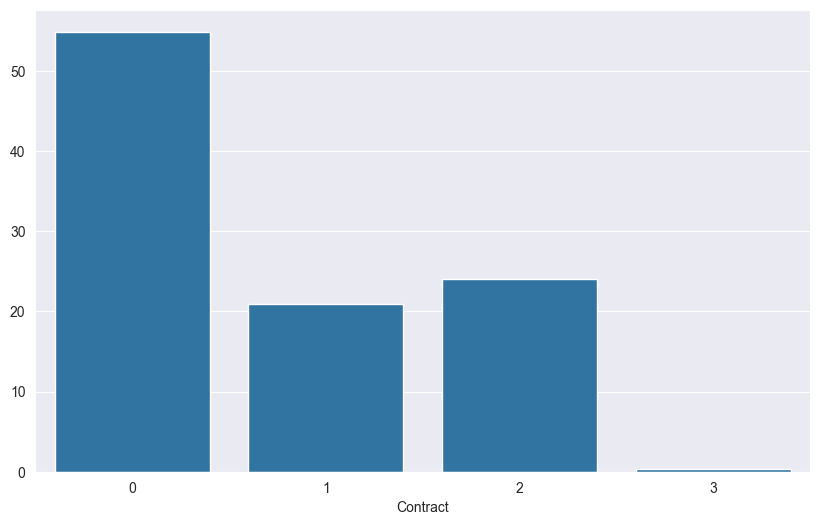

In [38]:
plt.figure(figsize=(10, 6))
Contract = Churn_data['Contract'].value_counts(normalize=True) * 100
sns.barplot(x=Contract.index, y=Contract.values)
plt.show()

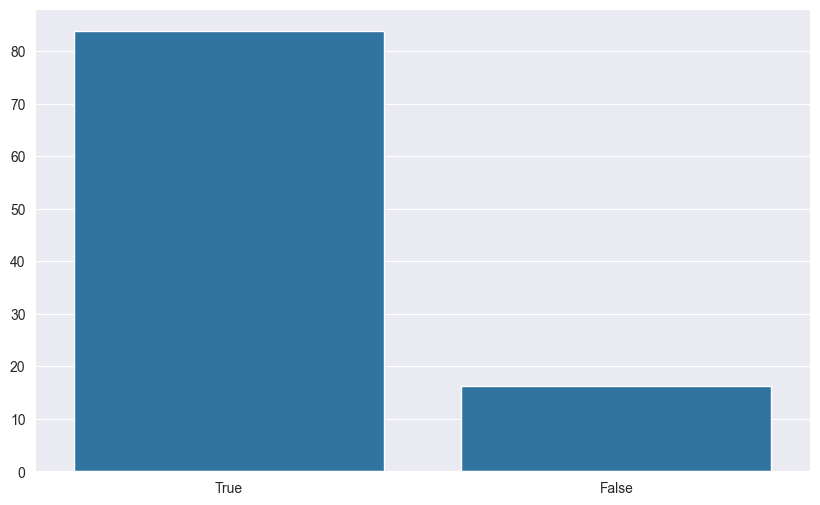

In [39]:
plt.figure(figsize=(10, 6))
SeniorCitizen = Churn_data['SeniorCitizen'].value_counts(normalize=True) * 100
sns.barplot(x=["True", "False"], y=SeniorCitizen.values)
plt.show()

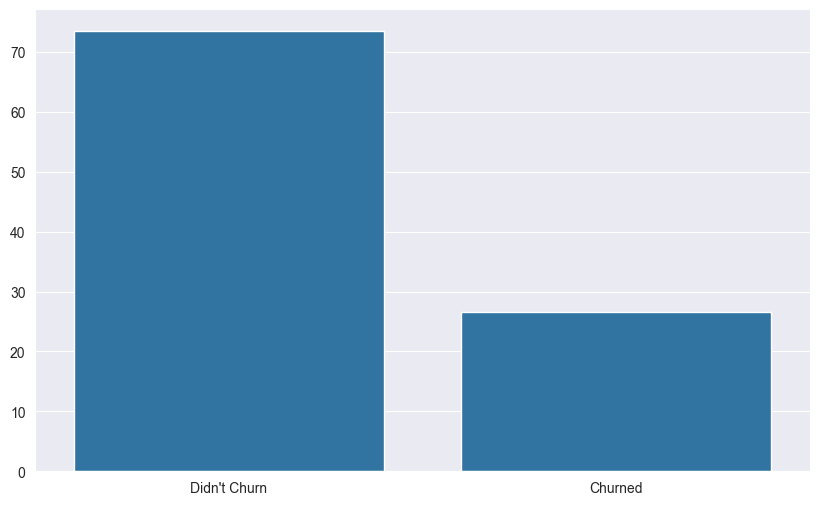

In [40]:
plt.figure(figsize=(10, 6))
Churn = Churn_data['Churn'].value_counts(normalize=True) * 100
sns.barplot(x=["Didn't Churn", "Churned"], y=Churn.values)
plt.show()

## Q3 - Most Important Insights
### 1. High correlation between TotalCharges and Tenure
### 2. Average Tenure is around 32 months
### 3. Average Monthly Charges is around 64
### 4. 16% of the customers are Senior Citizens
### 5. No outliers were found in the data
### 6. Electronic Check is the most preferred Payment Method
### 7. Month-to-Month Contract represents over half of the contracts
### 8. 26.5% of the customers have churned

## Q4 - Dashboard

In [41]:
!pip install plotly dash
!pip install dash_bootstrap_components

In [42]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import plotly.express as px
from dash.dependencies import Input, Output

In [43]:

# Initialize the Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Customer Analysis Dashboard"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[
            {'label': 'Gender', 'value': 'gender'},
            {'label': 'Senior Citizen', 'value': 'SeniorCitizen'},
            {'label': 'Internet Service', 'value': 'InternetService'},
            {'label': 'Contract Type', 'value': 'Contract'},
            {'label': 'Payment Method', 'value': 'PaymentMethod'}
        ],
        value='gender',
        clearable=False
    ),
    html.Div([
        dcc.Graph(id='churn-rate-chart'),
        dcc.Graph(id='customer-distribution')
    ])
])

@app.callback(
    [dash.dependencies.Output('churn-rate-chart', 'figure'),
     dash.dependencies.Output('customer-distribution', 'figure')],
    [dash.dependencies.Input('category-dropdown', 'value')]
)
def update_charts(selected_category):
    # Churn rate chart
    churn_rate = Dash_df.groupby(selected_category)['Churn'].value_counts(normalize=True).unstack()
    churn_rate = churn_rate.reset_index()
    fig_churn_rate = px.bar(churn_rate, x=selected_category, y='Yes', color='No', title=f'Churn Rate by {selected_category}',labels={'Yes': 'Churned', 'No': 'Retained'})

    # Customer distribution chart
    customer_distribution = Dash_df[selected_category].value_counts().reset_index()
    customer_distribution.columns = [selected_category, 'Count']
    fig_customer_dist = px.pie(customer_distribution, values='Count', names=selected_category, title=f'Customer Distribution by {selected_category}')

    return fig_churn_rate, fig_customer_dist

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


## Q5 - Preprocessing Steps
### 1. Encode Numerical Data that is Categorical
### 2. Encode Categorical Data
### 3. Deal with missing values
### 4. Scaling the data
### 5. Feature Selection

## Q6 - Possible Data Preprocessing
### 1. Encoded SeniorCitizen to be Categorical
### 2. Using either Label Encoding or Ordinal Encoding to encode the categorical data
### 3. Drop missing values, or use imputation to fill in the missing values
### 4. Scale the data using MinMaxScaler or StandardScaler
### 5. Drop features with high correlation

## Q7 - Data Preprocessing
### 1. Encoded SeniorCitizen to be Categorical and Converted TotalCharges to Numeric - Earlier in the Code
### 2. Encoded Categorical Data using Label Encoding since the data is not ordinal - Earlier in the Code
### 3. Dropped missing values since the missing data makes around 0,1% of the data

In [44]:
Churn_data.dropna(inplace=True)

### 4. Scaled the data using MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Churn_data[numericalColumn] = scaler.fit_transform(Churn_data[numericalColumn])
Churn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,0.000000,0,1,0,0,...,3,0,0,0,0,1,2,0.115423,0.001275,0
1,3962,1,0,0,0,0.464789,1,0,0,2,...,3,0,0,0,1,0,3,0.385075,0.215867,0
2,2564,1,0,0,0,0.014085,1,0,0,2,...,0,0,0,0,0,1,3,0.354229,0.010310,1
3,5535,1,0,0,0,0.619718,0,1,0,2,...,2,2,3,0,1,0,0,0.239303,0.210241,0
4,6511,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,2,0.521891,0.015330,1
5,6551,0,0,0,0,0.098592,1,2,1,0,...,2,0,2,2,0,1,2,0.809950,0.092511,1
6,1002,1,0,0,1,0.295775,1,2,1,0,...,0,0,3,0,0,1,1,0.704975,0.222779,0
7,4770,0,0,0,0,0.126761,0,1,0,2,...,0,0,0,0,0,0,3,0.114428,0.032668,0
8,5604,0,0,1,0,0.380282,1,2,1,0,...,2,2,2,2,0,1,2,0.861194,0.349325,1
9,4534,1,0,0,1,0.859155,1,0,0,2,...,0,0,0,0,1,0,0,0.377114,0.400317,0


### 5. Feature Selection, Dropped TotalCharges since it has high correlation with Tenure, it improved Logistic Regression's accuracy

## Q8 - Model Building
### XGBoost Classifier

In [47]:
!pip install xgboost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
Churn_data = Churn_data.reindex(sorted(Churn_data.columns), axis=1)

In [48]:
X = Churn_data.drop('Churn', axis=1)
y = Churn_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

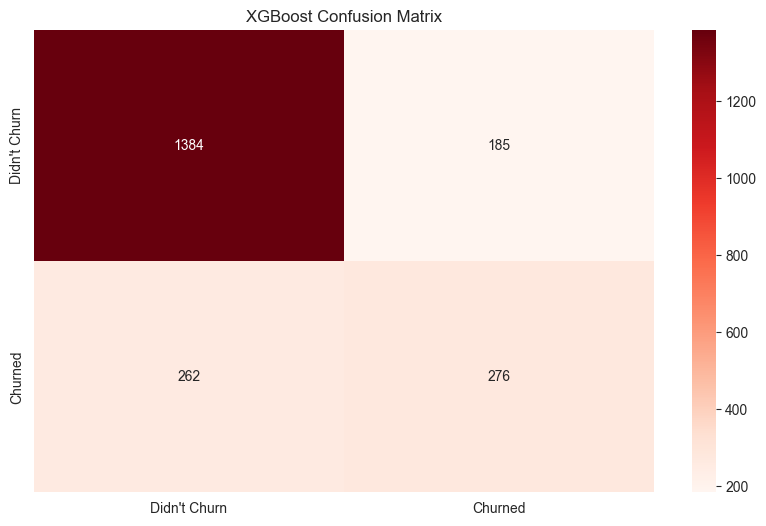

In [50]:
plt.figure(figsize=(10, 6))
plt.title('XGBoost Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds', xticklabels=['Didn\'t Churn', 'Churned'], yticklabels=['Didn\'t Churn', 'Churned'])
plt.show()

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=4000)
X = Churn_data.drop(['Churn', 'TotalCharges'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)
print(accuracy_score(y_test, y_pred_log))

0.7997152349311818


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

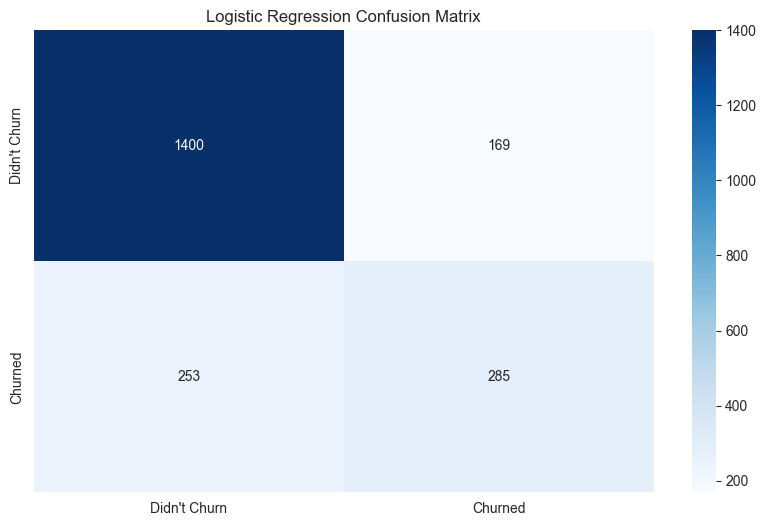

In [52]:
plt.figure(figsize=(10, 6))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Didn\'t Churn', 'Churned'], yticklabels=['Didn\'t Churn', 'Churned'])

## Q9 - Model Evaluation

<Axes: >

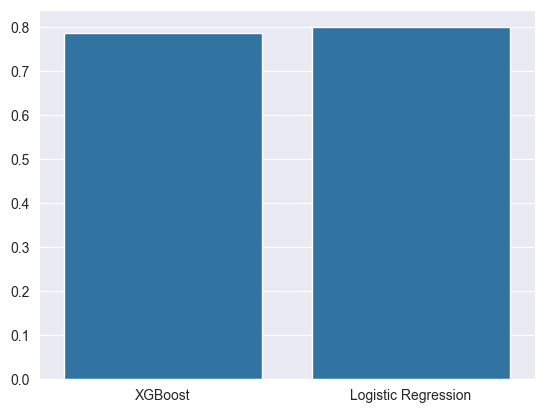

In [53]:
sns.barplot(x=['XGBoost', 'Logistic Regression'], y=[accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_log)])

In [54]:
# save to pkl file
!pip install joblib
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

### Q10 - Predict Incoming Rows

In [55]:
def predictChurn(data, MLModel):
    data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data.dropna(inplace=True)
    data['SeniorCitizen'] = le.fit_transform(data['SeniorCitizen'])
    data[categoryColumn] = le.fit_transform(data[categoryColumn])
    data[numericalColumn] = scaler.transform(data[numericalColumn])
    data.drop('TotalCharges', axis=1, inplace=True)
    return MLModel.predict(data)